In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players<-read_csv(file="data/players.csv")
sessions<-read_csv(file="data/sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [3]:
players |>
select(played_hours,Age) |>
summarize(across(everything(), ~ mean(.x, na.rm = TRUE))) |>
pivot_longer(everything(), names_to = "Variable", values_to = "Mean")

sessions |>
select(original_start_time,original_end_time) |>
summarize(across(everything(), ~ mean(.x, na.rm = TRUE))) |>
pivot_longer(everything(), names_to = "Variable", values_to = "Mean")

Variable,Mean
<chr>,<dbl>
played_hours,5.845918
Age,21.139175


Variable,Mean
<chr>,<dbl>
original_start_time,1.719201e+12
original_end_time,1.719196e+12


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


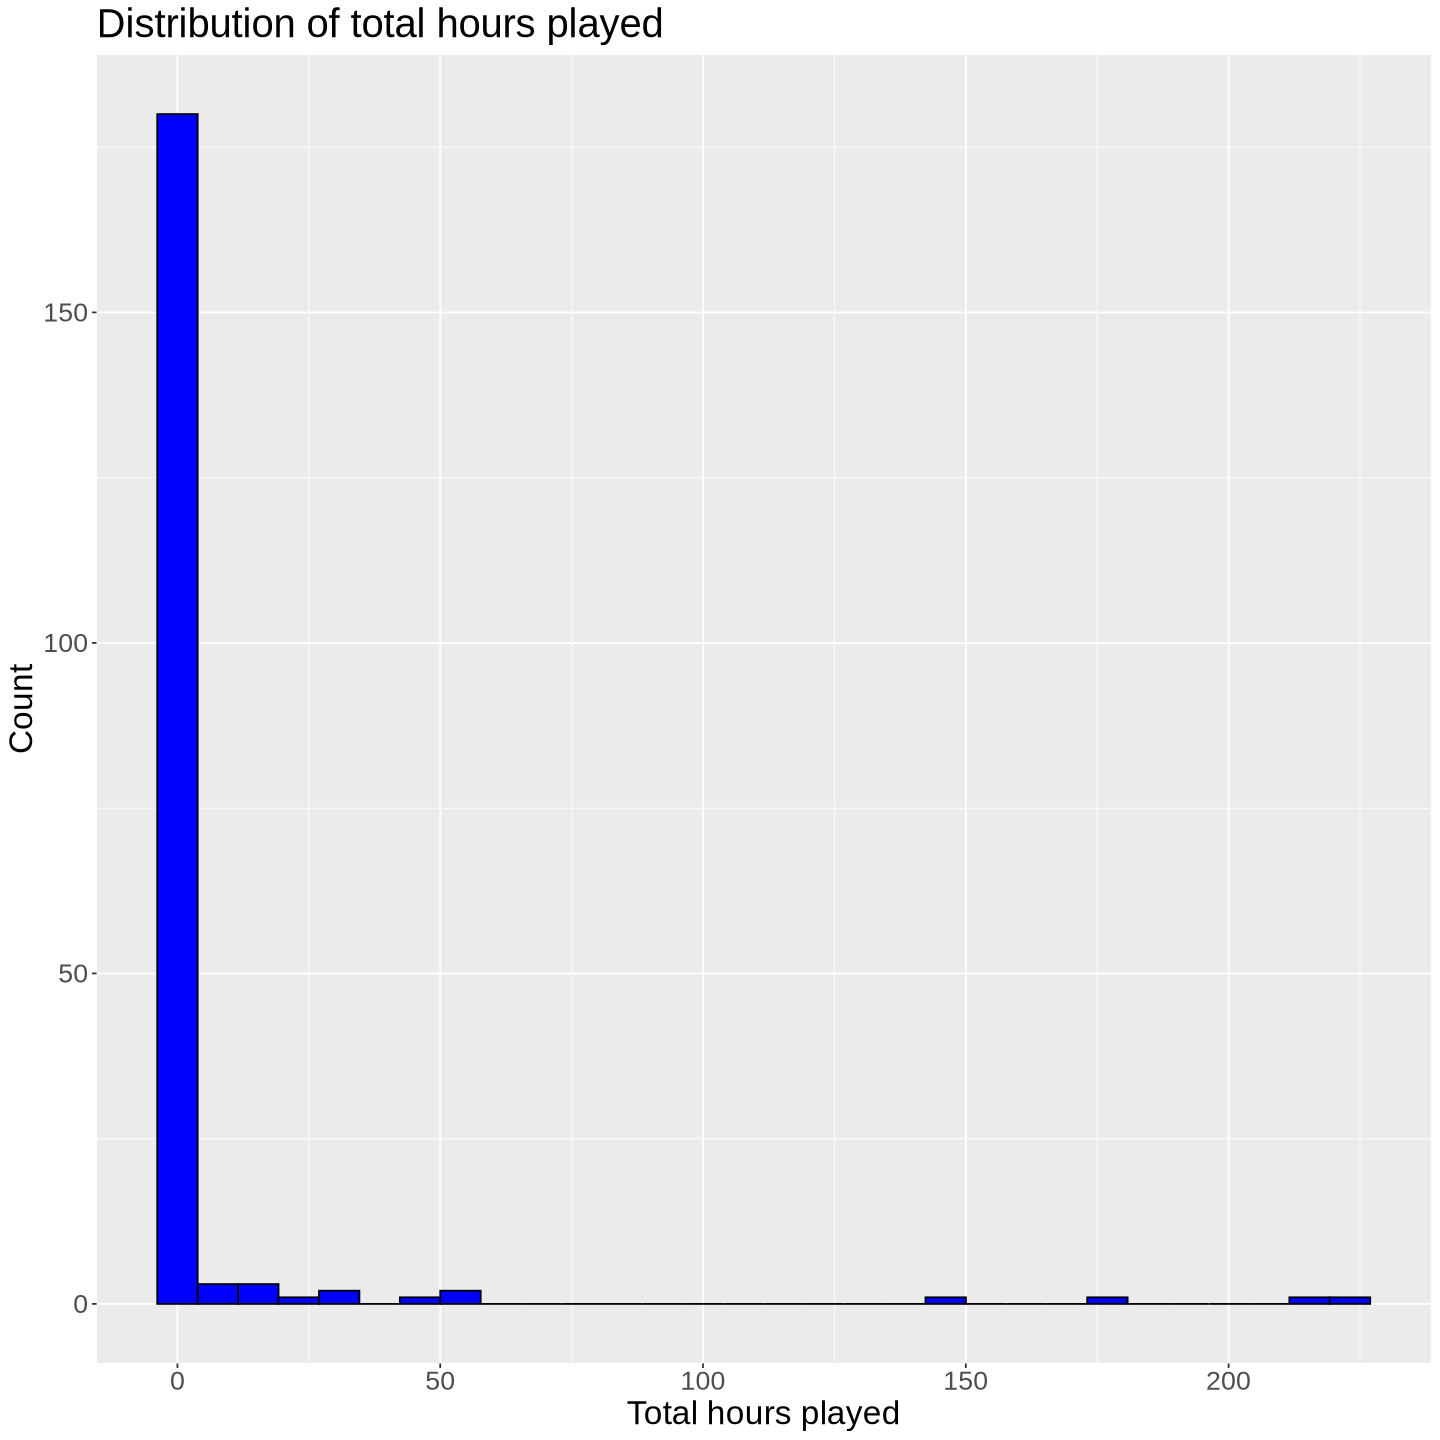

In [4]:
options(repr.plot.width = 12, repr.plot.height = 12)
players_plot<- ggplot(players,aes(x=played_hours))+
geom_histogram(fill="blue",color="black")+
labs(title="Distribution of total hours played",x="Total hours played",y="Count")+
theme(text=element_text(size=20))
players_plot

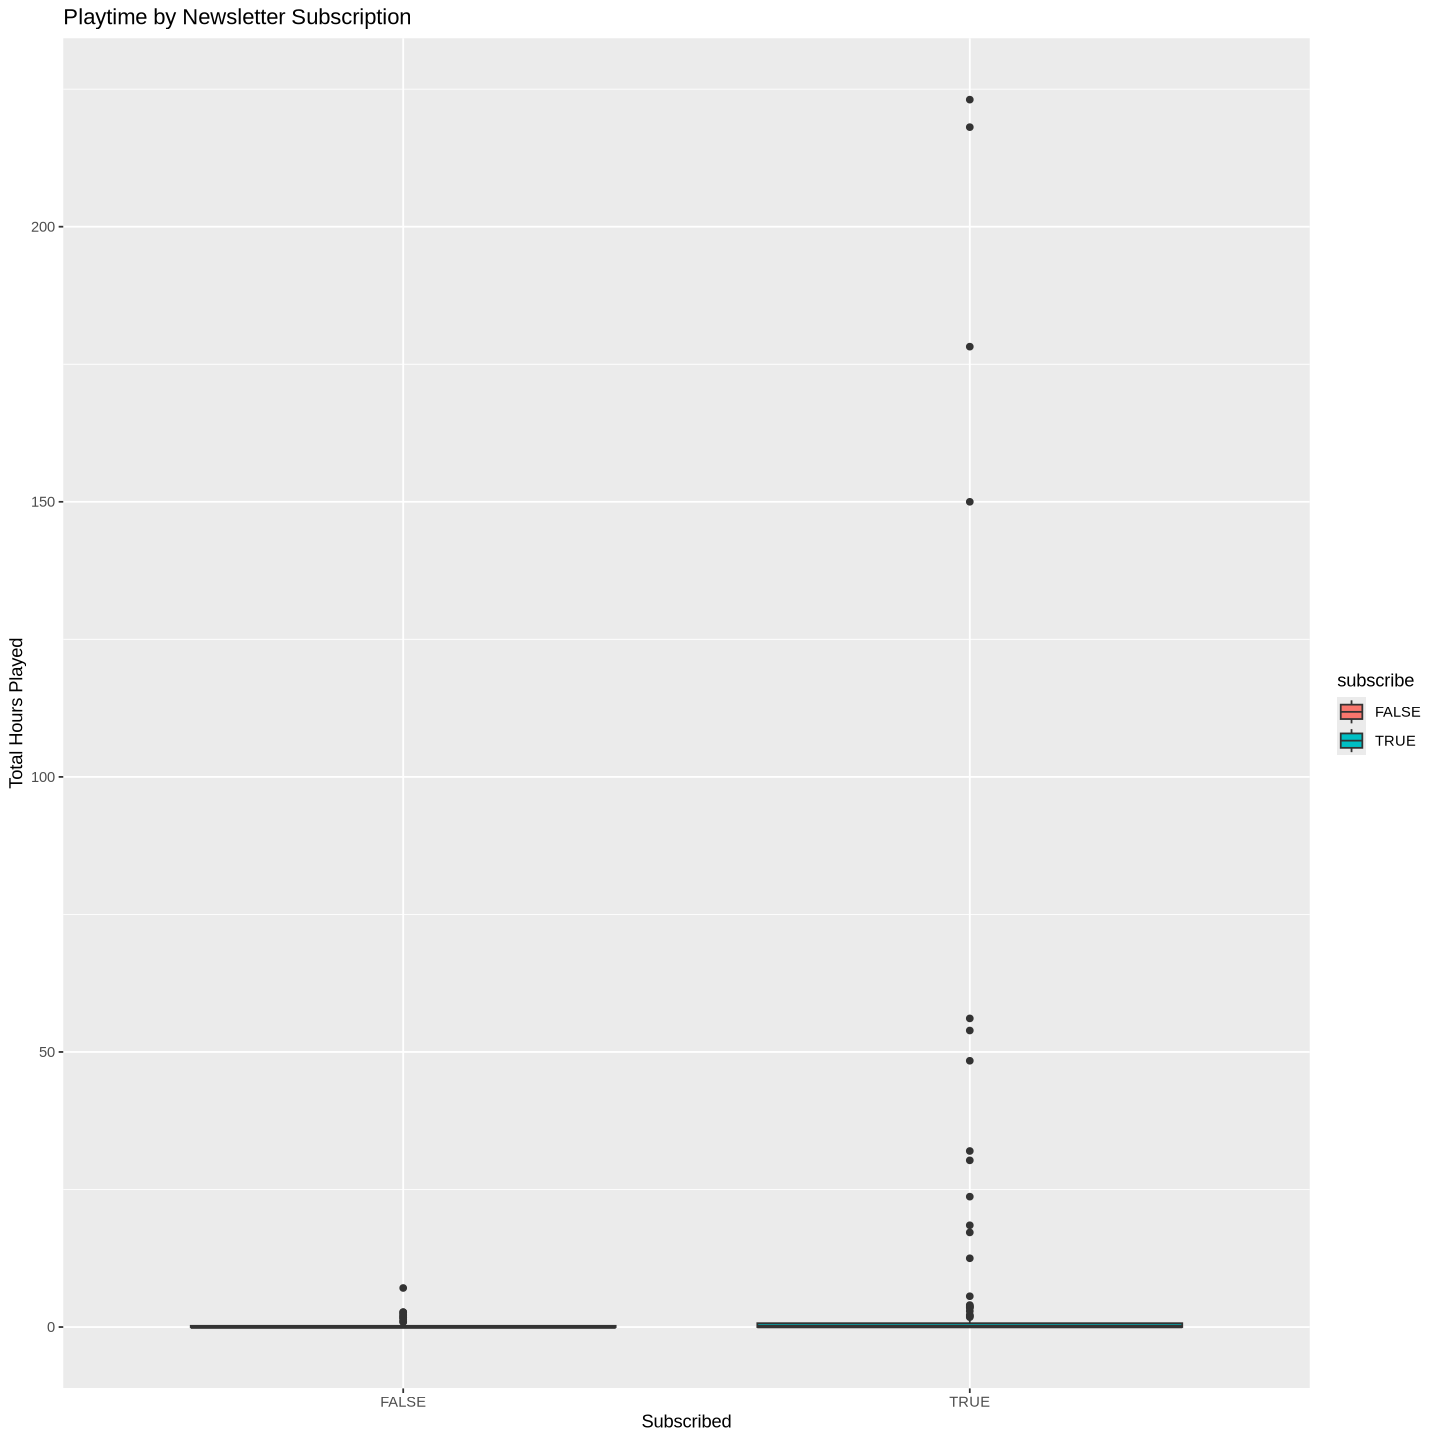

In [5]:
ggplot(players, aes(x=subscribe,y=played_hours,fill=subscribe))+
geom_boxplot()+
labs(title="Playtime by Newsletter Subscription",x="Subscribed",y="Total Hours Played")

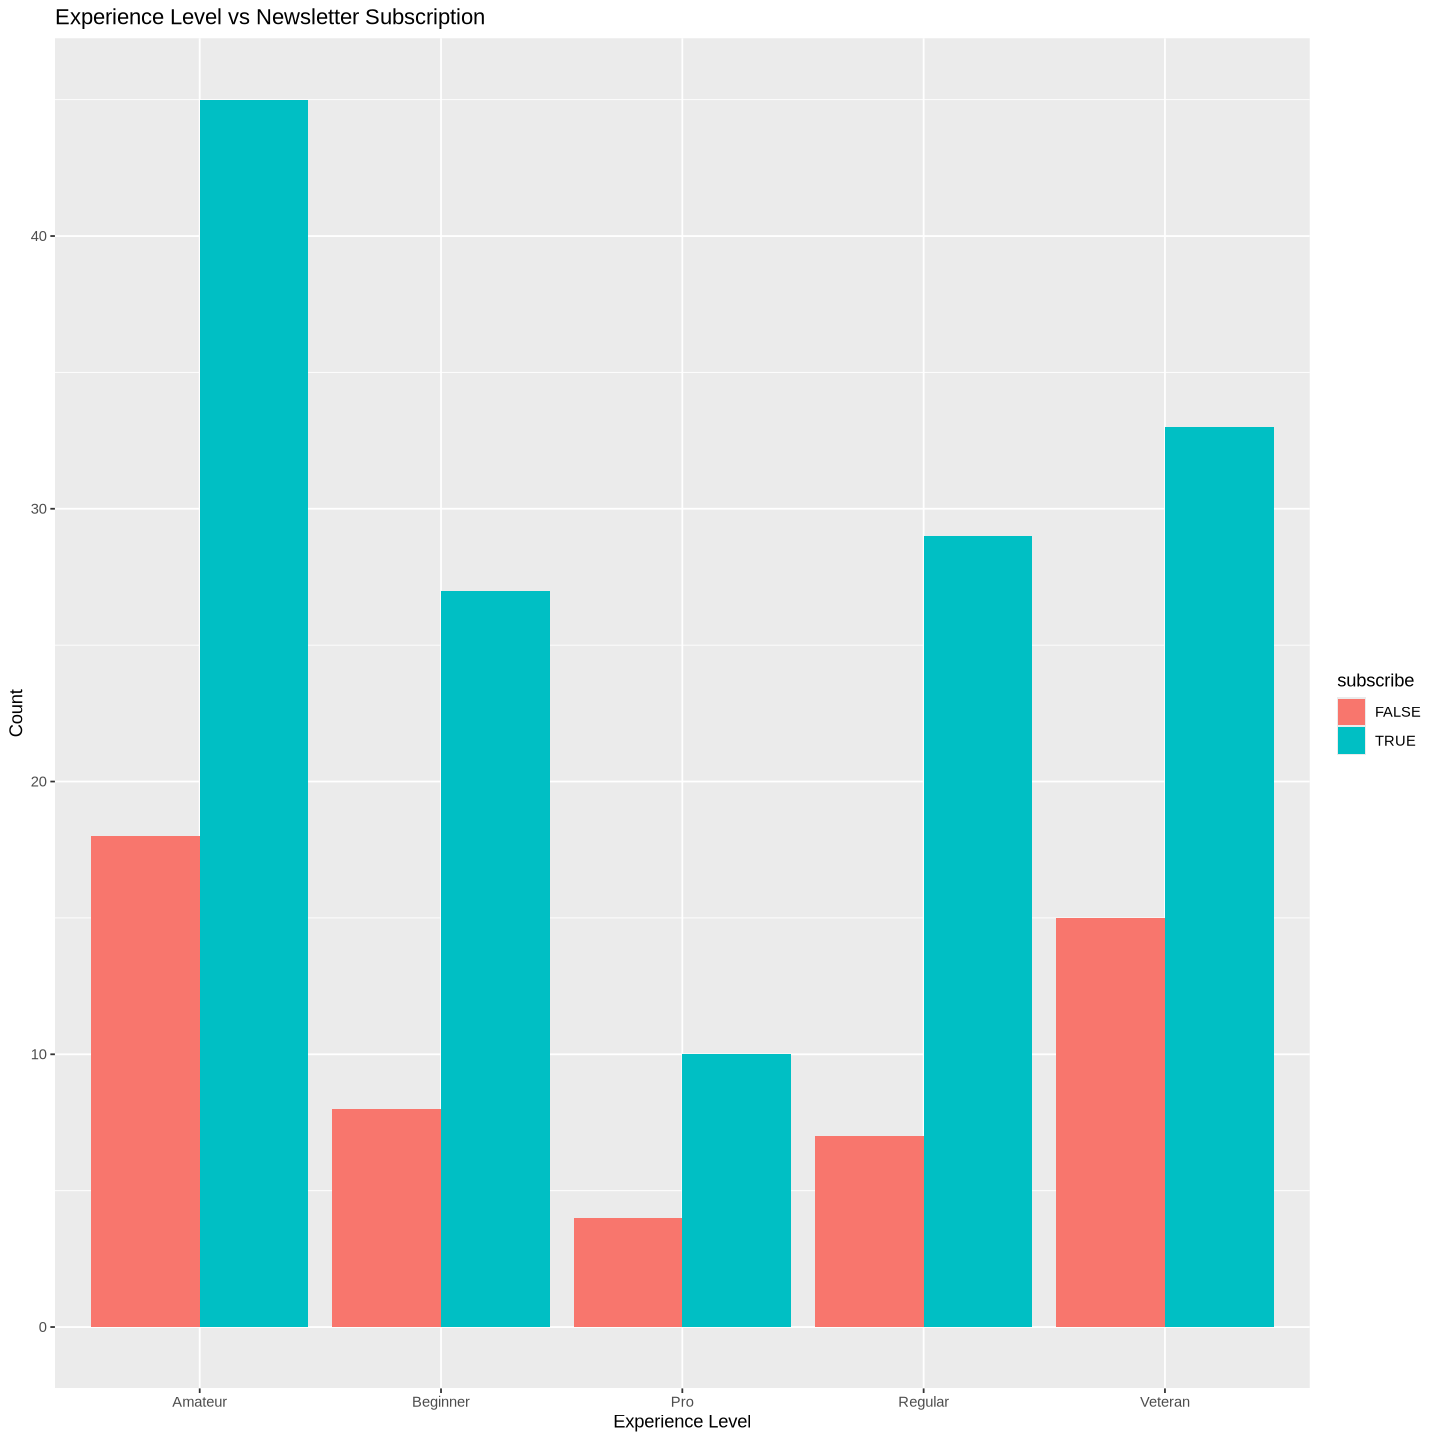

In [6]:
ggplot(players, aes(x=experience,fill=subscribe))+
geom_bar(position="dodge")+
labs(title="Experience Level vs Newsletter Subscription",x="Experience Level",y="Count")

## (1) Data Description

The data comes from a Minecraft research server that was operated by a reseach group at UBC. They evaluated how many people play video games. Two datasets were formed:

- **players.csv** — 196 observations, and 7 variables  
  - **experience** (character): Player experience (e.g., beginner, intermediate, expert)  
  - **subscribe** (logical): Whether the player is subscribed to the project’s newsletter  
  - **hashedEmail** (character): Unique anonymous ID for each player  
  - **played_hours** (numeric): Total hours played on the server  
  - **name** (character): Player name  
  - **gender** (character): Player’s reported gender  
  - **Age** (numeric): Player’s age (2 missing values)

  Mean values of numeric variables:  
  - *played_hours*: **5.85 hours**  
  - *Age*: **21.14 years**

- **sessions.csv** — 1535 observations, and 5 variables  
  - **hashedEmail** (character): Used to match players  
  - **start_time**, **end_time** (character): Start and end of a play session  
  - **original_start_time**, **original_end_time** (numeric): Alternative time encoding

  Mean values of numeric variables:

  -*original_start_time*: 🕰️**1.719201e+12**

  -*original_end_time*: **1.719196e+12**

Issues: Only 2 quantitative variables, limiting predictors. May also be biases and inconsistitencies in how the data was collected.



### (2) Question

**Broad question:** What player characteristics and behaviours are most predictive of newsletter subscription?

**Specific question:** Can things such as player experience level, age, gender, and total hours played predict whether a player subscribes to the newsletter?

The response variable is `subscribe`, while predictors include `experience`, `played_hours`, `gender`, and `Age`. This question matters because it is important to identify which types of players are more likely to stay engaged, helping the research group target recruitment and improve server resource planning.



### (3) Exploratory Data Analysis and Visualization

The dataset loads into R. Numeric variables are limited to `played_hours` and `Age`, both with realistic ranges but slight skew in `played_hours`.  
A histogram of `played_hours` shows most players spent under 10 hours in-game, with a few high outliers. Boxplots comparing `played_hours` by `subscribe` suggest subscribers generally played longer.

These findings imply playtime and experience may be strong predictors of newsletter subscription.



### (4) Methods and Plan

**Proposed method:** *k-nearest neighbours (KNN) classification.*

- **Why appropriate:** Non-parametric, interpretable, and effective for mixed numeric and categorical predictors.
- **Assumptions:** Distance metrics are meaningful once predictors are standardized and categorical variables encoded.
- **Limitations:** Sensitive to outliers and class imbalance, requires scaling.
- **Plan:**
  1. Merge `players.csv` and `sessions.csv` using `hashedEmail`.  
  2. Standardize numeric predictors (`played_hours`, `Age`) and encode categoricals (`experience`, `gender`).  
  3. Split data into 70% training / 30% testing sets.   
  4. Evaluate model accuracy and confusion matrix on the test set.



### (5) GitHub Repository

All code and progress for this project are tracked in:  
`https://github.com/vincccss/dsci100-project-planning.git`